# Time Series EDA

* Single continuous variable over (uniformly distributed) time
* Understand temporal behavior of data: trend and seasonality, cycle
* Identify underlying distribution and nature of temporal processes producing data

#### Setup 
°F = (K - 273.15) x 1.8000 + 32.00

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:

# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

#Range of dataset and shape of dataset
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


In [3]:

df.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


* seasonality: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality
    * Quite common in economic time series. It is less common in engineering and scientific data.
    * Can help us understand underlying dynamics
* trend: long term upwards or downwards movement
* cycle: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting
* Ideally all splits contain a season
* Human-based
* Percentage based
* Cross Validation

### Percentage Based

In [ ]:
#we are not randomnly picking the data points


In [4]:
# check shape of data
df.shape

(45252, 1)

In [7]:

# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
#what index we are going to start, EX).100 rows, I want 70 rows as train size
test_start_index = round(train_size * n)
test_start_index

31676

In [8]:
# create train and test dataframe
#take all obsevations until this index
train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [9]:
train

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-05-13 04:00:00,75.614000
2016-05-13 05:00:00,75.002000
2016-05-13 06:00:00,74.246000


In [10]:
test

,temp
datetime,
2016-05-13 09:00:00,73.112
2016-05-13 10:00:00,71.546
2016-05-13 11:00:00,71.222
2016-05-13 12:00:00,70.754
2016-05-13 13:00:00,72.644
...,...
2017-11-29 20:00:00,70.790
2017-11-29 21:00:00,72.806
2017-11-29 22:00:00,73.202


In [ ]:

# lets plot train and test

In [ ]:
#when addding in validate just ensure to capture seasonality (at least one year)

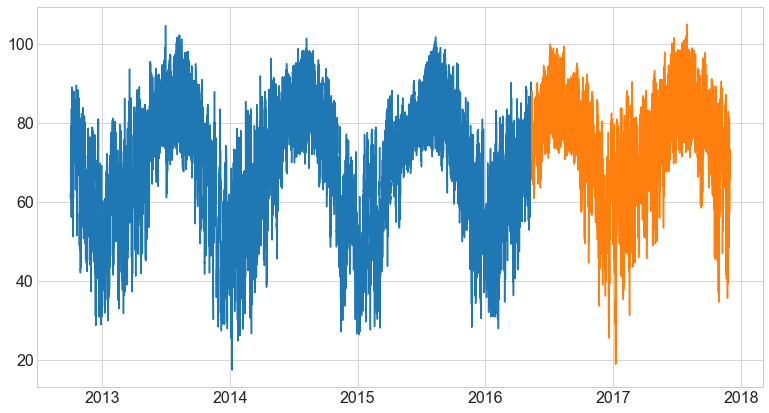

In [11]:
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Human based

In [12]:
df[:'2016']

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
...,...
2016-12-31 19:00:00,63.230000
2016-12-31 20:00:00,68.216000
2016-12-31 21:00:00,70.664000


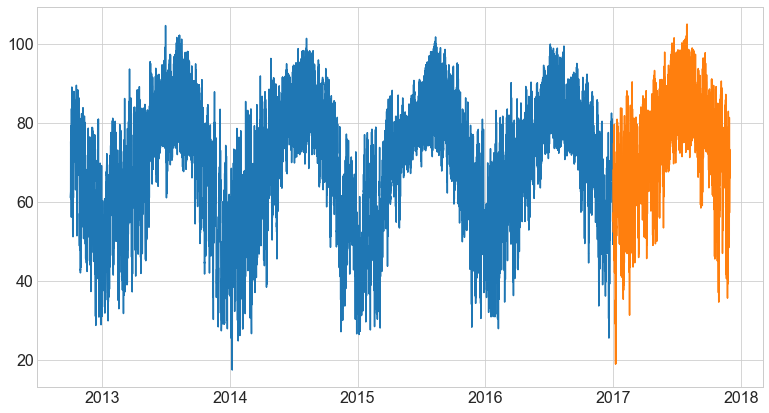

In [13]:
# Anything upto (and including) 2016 as train and rest as test
# ex). I havae four years worth of data, im going to use 2016 as train etc.  
# just making a choice on what to use as train and test based on domain knowledge

train = df[:'2016'] # includes 2016
test = df['2017']

# plot the train and test
plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

### Vizzes

In [15]:
# we will do visualization on train only:
train.head()

,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747


In [16]:
# create a series called 'y'

y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

### Don't consider the time series

<AxesSubplot:ylabel='Frequency'>

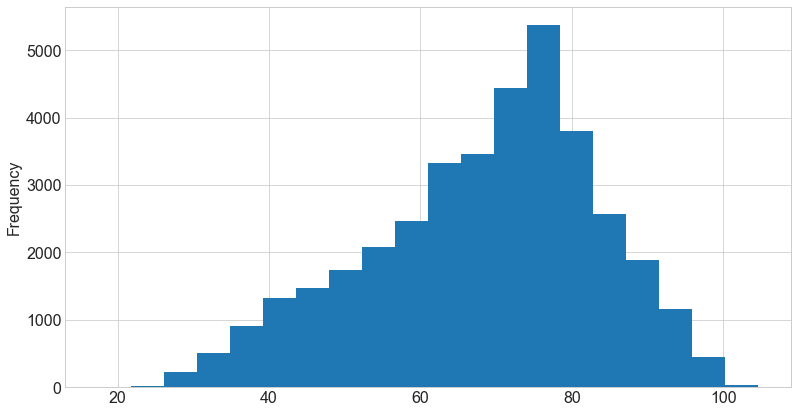

In [18]:
# plot a histogram of temperature
y.plot.hist(bins = 20)

* by month
* by weekday

In [19]:
y.index.month


Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=37259)

In [20]:
#make month column in train
train['month'] = y.index.month


<ipython-input-20-65cb202c491b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = y.index.month


In [21]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10
2012-10-01 14:00:00,61.076568,10
2012-10-01 15:00:00,61.139294,10
2012-10-01 16:00:00,61.202020,10
2012-10-01 17:00:00,61.264747,10


In [22]:
#can group by month and look at temperature
train.groupby('month').temp.mean()



month
1     49.831129
2     55.558854
3     61.421913
4     68.855211
5     73.742506
6     80.614231
7     83.449665
8     83.964775
9     79.356778
10    72.065809
11    60.545556
12    54.689498
Name: temp, dtype: float64

<AxesSubplot:xlabel='month'>

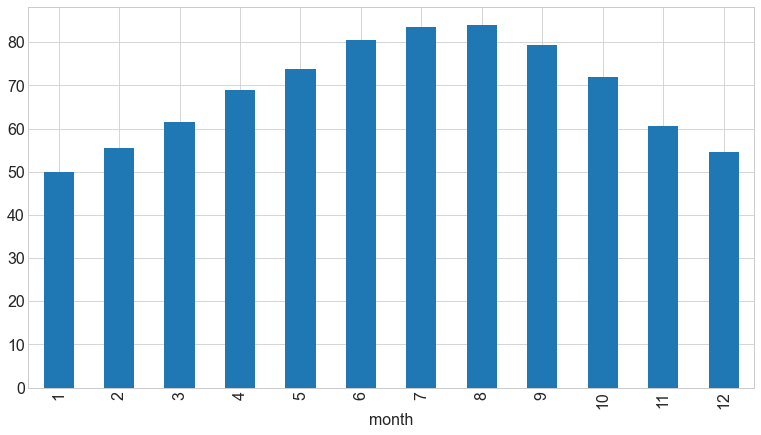

In [23]:
#Plot mean temperature by month (bar plot)
train.groupby('month').temp.mean().plot.bar()

In [ ]:
# can see how the temperatures risse and fall during diff seasons

In [24]:
#new column named weekday to display the day of the week
train['weekday'] = y.index.day_name()


<ipython-input-24-af5d687ad5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday'] = y.index.day_name()


In [25]:
# Plot mean temperature by weekday
train.groupby('weekday').temp.mean()

weekday
Friday       68.170992
Monday       68.326222
Saturday     68.376767
Sunday       68.551504
Thursday     68.195680
Tuesday      68.417980
Wednesday    68.481428
Name: temp, dtype: float64

<AxesSubplot:xlabel='weekday'>

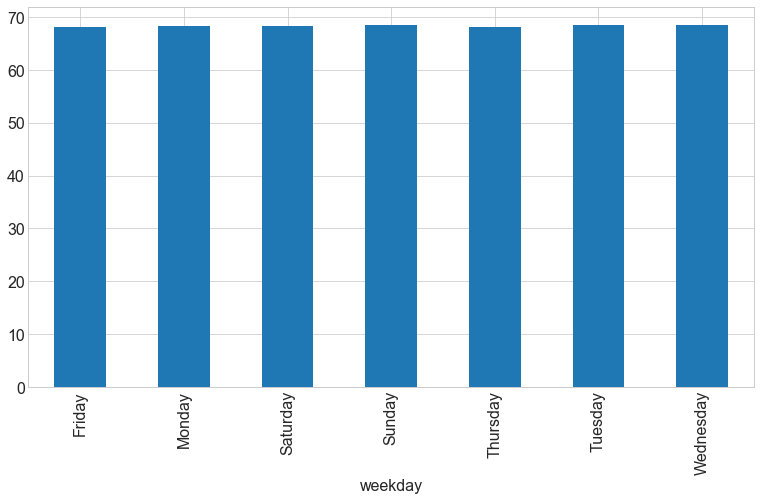

In [26]:
train.groupby('weekday').temp.mean().plot.bar()

In [ ]:
#dont see seasonailty based on weekday, which we shouldnt

#### What if we want to visualize more than just the mean temperature?

In [ ]:
#is there variations in weekday?  is there diff temps on fridays?

In [27]:
train.groupby('weekday').describe()


temp                                                      \
            count       mean        std      min       25%        50%   
weekday                                                                 
Friday     5328.0  68.170992  15.382317  24.7820  58.21550  71.105000   
Monday     5315.0  68.326222  15.330057  24.6560  58.54190  70.952000   
Saturday   5328.0  68.376767  14.682317  26.4740  59.34200  70.159805   
Sunday     5304.0  68.551504  14.673979  27.8780  59.68400  70.195400   
Thursday   5328.0  68.195680  15.571015  27.2078  57.59600  71.348000   
Tuesday    5328.0  68.417980  15.380445  17.4200  58.50950  71.432678   
Wednesday  5328.0  68.481428  15.146799  26.1500  57.98975  71.280884   

                                 month                                     \
                 75%       max   count      mean       std  min  25%  50%   
weekday                                                                     
Friday     78.476000  102.0920  5328.0  6.747748  3.518541  1.0  4.0  7.0   
Monday     79.034000  101.5160  5315.0  6.825588  3.501957  1.0  4.0  7.0   
Saturday   78.587375  101.8040  5328.0  6.779279  3.520021  1.0  4.0  7.0   
Sunday     78.836000  104.5400  5304.0  6.787330  3.506630  1.0  4.0  7.0   
Thursday   79.235660  102.0380  5328.0  6.765766  3.528736  1.0  4.0  7.0   
Tuesday    79.160000  101.6600  5328.0  6.815315  3.511847  1.0  4.0  7.0   
Wednesday  79.206350  100.7138  5328.0  6.788288  3.510321  1.0  4.0  7.0   

                       
            75%   max  
weekday                
Friday     10.0  12.0  
Monday     10.0  12.0  
Saturday   10.0  12.0  
Sunday     10.0  12.0  
Thursday   10.0  12.0  
Tuesday    10.0  12.0  
Wednesday  10.0  12.0

<AxesSubplot:xlabel='weekday', ylabel='temp'>

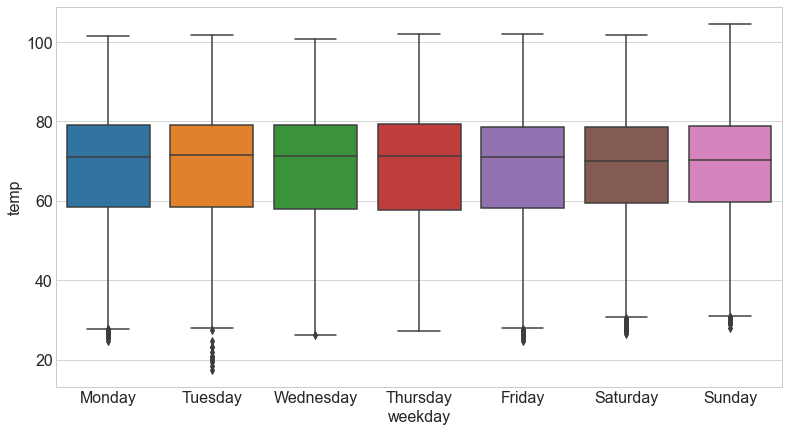

In [28]:
#capture median, iqrs, a goodway to look when you want ot see more than just mean
sns.boxplot(data = train, x = 'weekday', y = 'temp')


In [ ]:
# no trends between weekdays

<AxesSubplot:xlabel='month', ylabel='temp'>

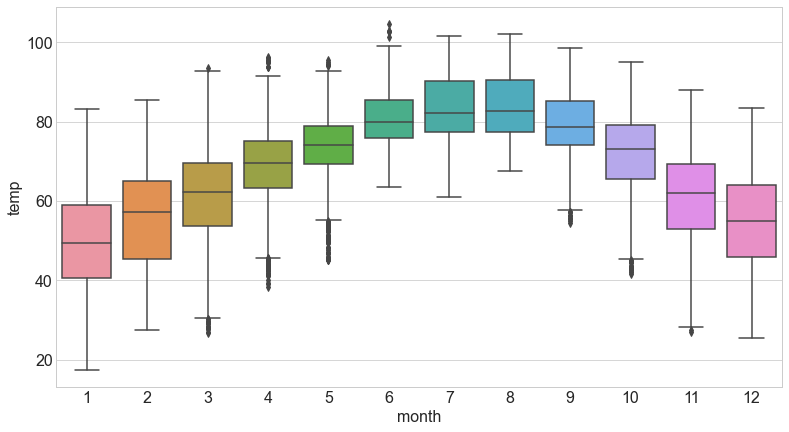

In [29]:
# Anything interesting in the chart above?

# Would the monthly boxplot look different?
sns.boxplot(data = train, x = 'month', y = 'temp')


In [ ]:
#more variation in temps in fall/winter
#less variation in temps in summer months

In [ ]:
#can see seasonality, can see low temps in jan, hot temps in summer, bigger spread of temps, more vairation in fall and winter than in summer

### Visualize the target over time

In [ ]:
y.plot();

In [ ]:
y.resample('6H').mean().plot(title='6 hour average')


In [ ]:
y.resample('2W').mean().plot(title='2 week average');


In [ ]:

y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

In [ ]:
y.resample('M').agg(['min', 'mean', 'max']).plot()


In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()


In [ ]:
#### We can reduce noise by resampling data the data to longer frequencies.

##Seasonaility to Trend

In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

In [ ]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')


In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')


In [ ]:
### Seasonal Plot
* comparison of multiple years together.

In [ ]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()


In [ ]:
table


In [ ]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.¶
* Do the data exhibit a seasonal pattern?
* What is the nature of the seasonality?
* Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
* Are there any outliers once seasonality has been accounted for?

* Should I use box plot instead?

### What if seasonality is not that readily apparent?
Is there a seasonality in this data?

### Lag plot

In [ ]:
y.shift(-1)

In [ ]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

In [ ]:
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [ ]:

weekly = train.resample('W').mean()
weekly['temp_next_week'] = weekly.temp.shift(-1)

weekly

In [ ]:
weekly.plot.scatter(x='temp', y='temp_next_week')


In [ ]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

In [ ]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

In [ ]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

In [ ]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())


### What does autocorrelation plot look like for white noise

In [ ]:

grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

In [ ]:

from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

### Seasonal Decomposition
$$ y = S + T + \epsilon $$
Seasonality + Trend + Residual

In [ ]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [ ]:
result.seasonal


In [ ]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

In [ ]:
decomposition.iloc[:, 1:].plot()


In [ ]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?¶
The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate.

https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/